In [363]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

Загрузите датасет, с которым работали в первой части. Если не помните, используйте функцию ниже.

In [364]:
df = pd.read_csv('D://Проект майнор/student-por.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


В качестве целевого признака мы будем использовать финальную оценку G3. Оценки G1 и G2 мы не будем использовать в
качестве признаков - они слишком сильно коррелируют с ответом.
Извлеките из остальных данных признаки:
* **(1 балл)(!)** Извлеките только числовые признаки
* **(1 балл)** Извлеките также бинарные и категориальные признаки

Ниже указано несколько инструментов, которые могут быть полезны (изучите самостоятельно):
* `pd.get_dummies`
* `sklearn.preprocessing.OneHotEncoder`
* `pd.concat`
* `np.hstack`

In [365]:
target = df['G3'].values

In [366]:
#Извлечем только числовые признаки

num_features = np.vstack([df['age'].values,
                 df['Medu'].values,
                 df['Fedu'].values,
                 df['traveltime'].values,
                 df['studytime'].values,
                 df['failures'].values,
                 df['famrel'].values,
                 df['freetime'].values,
                 df['goout'].values,
                 df['Dalc'].values,
                 df['Walc'].values,
                 df['health'].values,
                 df['absences'].values]).T

In [367]:
#Извлечем бинарные признаки

bin_df = pd.concat([pd.get_dummies(df['school']),
                        pd.get_dummies(df['sex']),
                        pd.get_dummies(df['address']),
                        pd.get_dummies(df['famsize']),
                        pd.get_dummies(df['Pstatus']),
                         pd.get_dummies(df['schoolsup']),
                         pd.get_dummies(df['famsup']),
                         pd.get_dummies(df['paid']),
                         pd.get_dummies(df['activities']),
                         pd.get_dummies(df['nursery']),
                         pd.get_dummies(df['higher']),
                         pd.get_dummies(df['internet']),
                         pd.get_dummies(df['romantic'])], axis = 1)
bin_features = bin_df.values
bin_features

array([[ 1.,  0.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  1., ...,  1.,  1.,  0.],
       [ 1.,  0.,  1., ...,  1.,  1.,  0.],
       ..., 
       [ 0.,  1.,  1., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  1.,  1.,  0.],
       [ 0.,  1.,  0., ...,  1.,  1.,  0.]])

In [368]:
#Извлечем категориальные признаки

cat_df = pd.concat([pd.get_dummies(df['Mjob']), pd.get_dummies(df['Fjob']), pd.get_dummies(df['reason']),
           pd.get_dummies(df['guardian'])],axis = 1)
cat_features = cat_df.values
cat_df.head()

,at_home,health,other,services,teacher,at_home,health,other,services,teacher,course,home,other,reputation,father,mother,other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [369]:
features = np.hstack([num_features, bin_features, cat_features])
print("Кол-во признаков:", len(features[0]))

Кол-во признаков: 56


**(1 балл)(!)** Проверьте, насколько хорошо работает линейная регрессия (`sklearn.linear_model.LinearRegression`) на этих данных с помощью кросс-валидации (`sklearn.cross_validation.cross_val_score`). Для этого в функцию `cross_val_score` нужно передать аргумент `scoring='mean_squared_error'` (учтите, что по техническим причинам функция будет возвращать значения MSE с минусом). Выведите результат в терминах RMSE.

In [370]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

def testreg(reg):
    score =  cross_val_score(reg,features,target, scoring='mean_squared_error')
    print('RMSE = ', (abs(score)**0.5).mean())

In [371]:
linreg = LinearRegression()
testreg(linreg)

RMSE =  2.91995290625


**(2 балла)(!)**
Теперь проверьте качество работы всех следующих регрессоров (используйте любые параметры):
* Линейная регрессия с $L_1$-регуляризацией (`sklearn.linear_model.Lasso`)
* Линейная регрессия с $L_2$-регуляризацией (`sklearn.linear_model.Ridge`)
* Дерево решений (`sklearn.tree.DecisionTreeRegressor`)
* Случайный лес (`sklearn.ensemble.RandomForestRegressor`)
* Метод ближайших соседей (`sklearn.neighbors.KNeighborsRegressor`)

In [372]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [373]:
ridge_reg = Ridge(alpha=5)
testreg(ridge_reg)

RMSE =  2.90126904781


In [374]:
lasso_reg = Lasso(alpha=0.3)
testreg(lasso_reg)

RMSE =  3.10107811734


In [375]:
Tree_reg = DecisionTreeRegressor(max_depth = 4)
testreg(Tree_reg)

RMSE =  3.13230768108


In [376]:
Forest_reg = RandomForestRegressor()
testreg(Forest_reg)

RMSE =  3.00857559289


In [377]:
Neigh_reg = KNeighborsRegressor(weights = 'distance')
testreg(Neigh_reg)

RMSE =  3.20526703782


Теперь ваша задача - подобрать наилучший способ обучения. Для этого можно применять разные приемы, за проверку каждого из них вы получаете баллы (код проверки для неудачных вариантов нужно оставить):
* **(1 балл)** Шкалирование признаков (`sklearn.preprocessing.StandardScaler()` и др.)
* **(2 балла)** Подбор оптимальных параметров перебором
* **(2 балла)** Отбор признаков с помощью, например, корреляции Пирсона

In [378]:
# Шкалирование признаков
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features2 = features
features = scaler.fit_transform(features)

In [379]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor().fit(features,target)
testreg(model)

RMSE =  3.07434191485


In [380]:
model.feature_importances_

array([ 0.02416143,  0.02745692,  0.0276871 ,  0.02396428,  0.03082291,
        0.14328998,  0.02194151,  0.02437738,  0.03040217,  0.02630531,
        0.03613885,  0.01640963,  0.04257566,  0.01431783,  0.0340347 ,
        0.0174746 ,  0.01162812,  0.00676052,  0.00890209,  0.01218052,
        0.00700573,  0.00815112,  0.0046458 ,  0.00568495,  0.0174414 ,
        0.01672007,  0.0094052 ,  0.00115381,  0.00195149,  0.00789975,
        0.01638682,  0.00922879,  0.00730696,  0.0372565 ,  0.03796031,
        0.00902844,  0.00639561,  0.00846427,  0.00663723,  0.01025787,
        0.00912489,  0.01399024,  0.00690017,  0.01231696,  0.00857112,
        0.003545  ,  0.01173598,  0.01359738,  0.0240355 ,  0.01548044,
        0.00840865,  0.02094134,  0.01907228,  0.01068454,  0.00884815,
        0.00293373])

In [381]:
#np.delete(features, np.s_[19,20,25,43,48,53],1)

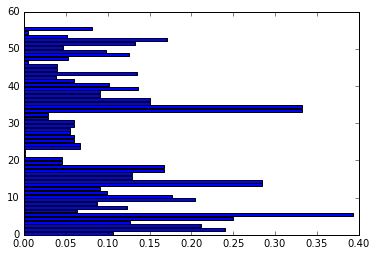

In [382]:
from scipy.stats import pearsonr

corrs = []
for f in range(len(features.T)):
    corrs.append(abs(pearsonr(features[:, f], target)[0]))
    
ypos = range(56)
plt.barh(ypos, corrs)
pass

In [383]:
bad_feat = []
for i in range(len(corrs)):
    if corrs[i]<0.1:
        bad_feat.append(i)

In [384]:
features = np.delete(features, bad_feat,1)

In [385]:
len(features.T)

25

In [386]:
testreg(ridge_reg)

RMSE =  2.8843627507


Ошибка уменьшилась после отбора признаков и масштабирования!


# Подберем наилучшие параметры для L-2 и L-1 регуляризации

In [387]:
from sklearn.linear_model import RidgeCV
cv = RidgeCV(alphas = np.logspace(-4,1,100,base = 10))
testreg(cv)
cv.fit(features,target)
print(cv.alpha_)

RMSE =  2.88273665295
10.0


In [388]:
from sklearn.linear_model import LassoCV
cv2 = LassoCV(alphas = np.logspace(-4,1,100,base = 10),n_jobs = -1)
testreg(cv2)
cv2.fit(features,target)
print(cv2.alpha_)

RMSE =  2.85996763567
0.0599484250319


# Подберем наилучшие параметры для решающего дерева и леса

In [389]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state = 6632)

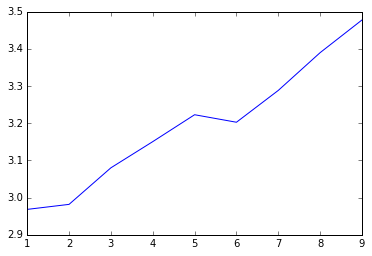

In [390]:
def rmse_on_depth(reg_class, alpha_values):
    error = []
    for alpha in alpha_values:
        reg = reg_class(max_depth=alpha)
        score =  cross_val_score(reg,features,target, scoring='mean_squared_error')
        error.append((abs(score)**0.5).mean())
        
    plt.figure()
    plt.plot(alpha_values, error)
    
rmse_on_depth(DecisionTreeRegressor, np.arange(1, 10, 1))

In [391]:
Tree_reg = DecisionTreeRegressor(max_depth = 1)
testreg(Tree_reg)

RMSE =  2.96831970261


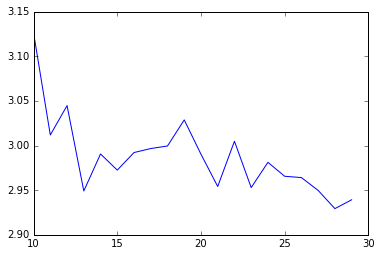

In [392]:
def rmse_on_estim(reg_class, alpha_values):
    error = []
    for alpha in alpha_values:
        reg = reg_class(n_estimators=alpha)
        score =  cross_val_score(reg,features,target, scoring='mean_squared_error')
        error.append((abs(score)**0.5).mean())
        
    plt.figure()
    plt.plot(alpha_values, error)
    
rmse_on_estim(RandomForestRegressor, np.arange(10, 30, 1))

In [393]:
forest_reg = RandomForestRegressor(n_estimators = 21)
testreg(forest_reg)

RMSE =  2.92416161245


In [394]:
forest_reg = RandomForestRegressor(n_estimators = 14, max_depth = 6)
testreg(forest_reg)

RMSE =  2.93723799298


In [395]:
forest_reg = RandomForestRegressor(n_estimators = 14, max_depth = 5)
testreg(forest_reg)

RMSE =  2.93105107312


In [396]:
forest_reg = RandomForestRegressor(n_estimators = 14, max_depth = 4)
testreg(forest_reg)

RMSE =  2.95047349884


In [397]:
forest_reg = RandomForestRegressor(n_estimators = 14, max_depth = 3)
testreg(forest_reg)

RMSE =  2.97549715353


# Подберем параметры для KNeighbors

In [398]:
Neigh_reg = KNeighborsRegressor(weights = 'distance')
testreg(Neigh_reg)

RMSE =  3.08986605749


In [399]:
Neigh_reg = KNeighborsRegressor()
testreg(Neigh_reg)

RMSE =  3.10250193619


In [400]:
Neigh_reg = KNeighborsRegressor(n_neighbors = 10, weights = 'distance')
testreg(Neigh_reg)

RMSE =  3.01471315844


In [401]:
Neigh_reg = KNeighborsRegressor(n_neighbors = 11, weights = 'distance')
testreg(Neigh_reg)

RMSE =  2.98127540432


In [402]:
Neigh_reg = KNeighborsRegressor(n_neighbors = 12, weights = 'distance')
testreg(Neigh_reg)

RMSE =  2.97642081769


In [403]:
best_Neigh_reg = KNeighborsRegressor(n_neighbors = 11, weights = 'distance')
testreg(best_Neigh_reg)

RMSE =  2.98127540432


# Итог: лучшим регрессором оказалась линейная регрессия с L-1 регуляризацией

In [404]:
cv = Ridge(alpha = 10)
testreg(cv)

RMSE =  2.88273665295
